# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Hilmy Dzaky
- **Email:** hilmy.dzaky25@gmail.com
- **ID Dicoding:** dzaky302

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pengukuran kualitas udara di tiap stasiun?
- Bagaimana perkembangan indikator kualitas udara pertahunnya?
- Bagaimana pergerakan tiap indikator perbulannya?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as stl

## Data Wrangling

### Gathering Data

Ekstrak data dari ZIP File yang diberikan kemudian didapatkan folder bernama PRSA_DATA_20130301-20170228.

Folder terdiri dari 12 file .csv dari 12 stasiun berbeda dari tanggal 1 Maret 2013 sampai 28 Februari 2017.

Koneksikan tiap file .csv di folder tersebut dan buat tabel dari masing-masing dataset menggunakkan nama stasiun.

In [4]:
#Kita persingkat nama-nama stasiun nya untuk efisiensi dalam analisis data

#Aoti_df mewakili dataset stasiun Aotizhongxin
Aoti_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

#Chang_df mewakili dataset stasiun Changping
Chang_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")

#Ding_df mewakili dataset stasiun Dingling
Ding_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")

#Dong_df mewakili dataset stasiun Dongsi
Dong_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")

#Guan_df mewakili dataset stasiun Guanyuan
Guan_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")

#Gu_df mewakili dataset stasiun Gucheng
Gu_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")

#Hua_df mewakili dataset stasiun Huairou
Hua_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")

#Nong_df mewakili dataset stasiun Nongzhanguang
Nong_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")

#Shu_df mewakili dataset stasiun Shunyi
Shu_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")

#Tia_df mewakili dataset stasiun Tiantan
Tia_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")

#Wanu_df mewakili dataset stasiun Wanliu
Wanu_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")

#Wans_df mewakili dataset stasiun Wanshouxigong
Wans_df = pd.read_csv("/content/drive/MyDrive/Dataset/dicoding_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")


#Seluruh dataset tersebut dikumpulkan dalam 1 list untuk mempermudah assessmen
aq_df = [Aoti_df, Chang_df, Ding_df, Dong_df, Guan_df, Gu_df, Hua_df, Nong_df, Shu_df, Tia_df, Wanu_df, Wans_df]

#Lihat seluruh tampilan dari 5 data teratas dari tiap dataset dengan menggunakkan for
for i in aq_df:
  print(i.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013 

Penjelasan atribut data:

- No:(integer) Jumlah baris dalam kumpulan data, dianggap sebagai kuantitatif
- Year: (integer) tahun data, dianggap sebagai kategorikal
- Month: (integer) bulan dari data, dianggap sebagai kategorikal
- Day: (integer) hari dari data, dianggap sebagai kategorikal
- Hour: (integer) jam dari data, dianggap sebagai kategorikal
- PM2.5: (integer) Konsentrasi PM2.5 per jam di area tersebut. Diukur dalam (ug/m³), dianggap sebagai - kontinu
- PM10: (integer) HKonsentrasi PM2.5 per jam di area tersebut. Diukur dalam (ug/m³), dianggap sebagai kontinu
- SO2: (integer) Konsentrasi PM2.5 per jam di area tersebut. Diukur dalam (ug/m³), dianggap sebagai kontinu
- NO2: (integer) Konsentrasi PM2.5 per jam di area tersebut. Diukur dalam (ug/m³), dianggap sebagai kontinu
- CO-:(integer) Konsentrasi PM2.5 per jam di area tersebut. Diukur dalam (ug/m³), dianggap sebagai kontinu
- O3:(integer) HKonsentrasi PM2.5 per jam di area tersebut. Diukur dalam (ug/m³), dianggap sebagai kontinu
- PRES:(integer) Tekanan udara di area tersebut. Diukur dalam Pascal, dianggap sebagai kontinu
- DEWP:(integer) suhu titik derajat yang dianggap kontinu
- RAIN: (integer) Curah hujan di area yang dianggap kontinu
- WD: (string) Arah angin di area tersebut, dianggap sebagai kategorikal.
- WSPM () Kecepatan angin. Diukur dalam (m/s), dianggap sebagai kontinu
- Station(string): Nama lokasi pemantauan kualitas udara. Data terdiri dari 12 lokasi pemantauan di Beijing, dianggap sebagai kategorikal


Sumber : https://medium.com/@rsehrawat75/beijing-air-quality-visualisation-92c6e04ec8fd

### Assessing Data

Dari hasil tampilan data tersebut, dapat kita simpulkan bahwa seluruh tabel memiliki atribut yang sama, hanya berbeda di stasiunnya saja. Untuk itu dapat kita gabung seluruh tabelnya menjadi 1 kesatuan tabel.

In [5]:
#Gabungkan seluruh tabel
aq_gabungan = pd.concat(aq_df, axis=0)

#Buat list dengan nama-nama kolom untuk mempermudah analisis
aqindex_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'] #Kolom-kolom yang diperuntukkan untuk menghitung Air Quality Index
other_columns = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'] #Kolom lain
all_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'] #Keseluruhan kolom numerik

In [6]:
#Buat fungsi untuk mempermudah melihat informasi
def segala_info(data_set):
  print("Info Kolom Dataset: \n", data_set.info())
  print("Jumlah Data yang hilang: \n", data_set.isna().sum())
  print("Jumlah Data yang duplikasi: \n", data_set.duplicated().sum())
  print("Statistik Deskriptif: \n", data_set.describe(include='all'))
  print("------------------------------------------------------------------------------------------------------------------------------------------------------") #untuk membatasi antar tabel

In [7]:
#Aktifkan fungsi
segala_info(aq_gabungan)

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB
Info Kolom Dataset: 
 None
Jumlah Data yang hilang:

Hasil dari assessment data menunjukkan bahwa hal, diantaranya:
- Jumlah baris seharusnya 420,768
- Kolom 'No' sampai 'Hour' seharusnya adalah kategori
- Terdapat banyak missing values dari kolom 'PM2.5' sampai 'WSPM'
- Tidak ada data duplikasi
- Terdapat 12 stasiun pendeteksi dengan yang terbanyak adalah Aotizhongxin


Maka dapat kita tentukan langkah berikutnya yaitu pembersihan data

### Cleaning Data

Terdapat dua poin utama pembersihan data, yaitu

1.   Mengubah kolom 'No' sampai 'Hour' menjadi kategorik
2.   Menghilangkan missing values


#### Mengubah tipe kolom

Untuk mengubah tipe kolom menjadi kategorik, maka tipe data diubah menjadi tipe 'objek'

In [8]:
aq_gabungan['No'] = aq_gabungan['No'].astype('object')
aq_gabungan['year'] = aq_gabungan['year'].astype('object')
aq_gabungan['month'] = aq_gabungan['month'].astype('object')
aq_gabungan['day'] = aq_gabungan['day'].astype('object')
aq_gabungan['hour'] = aq_gabungan['hour'].astype('object')

In [9]:
aq_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  object 
 1   year     420768 non-null  object 
 2   month    420768 non-null  object 
 3   day      420768 non-null  object 
 4   hour     420768 non-null  object 
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), object(7)
memory usage: 61.0+ MB


#### Mengatasi data hilang

Karena setiap indikator sangat penting untuk perhitungan indeks kualitas udara, maka untuk baris yang tidak memiliki value akan dihilangkan.

In [10]:
def bersihin_missval(tabel):
  tabel = tabel.dropna()
  return tabel

In [11]:
aq_gabungan = bersihin_missval(aq_gabungan)
print("Jumlah data hilang : \n", aq_gabungan.isna().sum())

Jumlah data hilang : 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Simpan data yang sudah dibersihkan

In [12]:
aq_gabungan.to_csv("air_quality.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore data Air Quality

Sebelum masuk ke analisis lebih lanjut, perlu dicek kembali statistik deskriptif dari tabel gabungan

In [13]:
print(aq_gabungan.describe(include='all'))

              No      year     month       day      hour          PM2.5  \
count   382168.0  382168.0  382168.0  382168.0  382168.0  382168.000000   
unique   34820.0       5.0      12.0      31.0      24.0            NaN   
top      19706.0    2015.0       3.0       3.0      23.0            NaN   
freq        12.0   99492.0   33536.0   12790.0   16307.0            NaN   
mean         NaN       NaN       NaN       NaN       NaN      79.432383   
std          NaN       NaN       NaN       NaN       NaN      80.154901   
min          NaN       NaN       NaN       NaN       NaN       2.000000   
25%          NaN       NaN       NaN       NaN       NaN      20.000000   
50%          NaN       NaN       NaN       NaN       NaN      55.000000   
75%          NaN       NaN       NaN       NaN       NaN     111.000000   
max          NaN       NaN       NaN       NaN       NaN     844.000000   

                 PM10            SO2            NO2             CO  \
count   382168.000000  382168

Setelah pembersihan data, didapatkan jumlah baris yang tersisa adalah 382,168 baris.

Langkah berikutnya, buat beberapa tabel ringkas untuk mempermudah visualisasi data sehingga dapat menjawab pertanyaan yang telah diajukan.

#### Tabel pertahun

In [14]:
#Buat tabel perkembangan tiap indikator dari 2013 hingga 2017
aq_tahun = aq_gabungan.groupby(['year'])[all_columns].agg('mean')
aq_tahun

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,
2013,80.545521,103.872563,20.117520,52.184598,1195.993874,57.144064,15.967051,1007.612631,5.743327,0.066585,1.603099
2014,84.798882,115.734197,20.390402,54.683064,1246.198654,58.063576,14.168331,1010.429191,2.970502,0.050001,1.637479
2015,79.173509,103.195536,13.097469,48.262125,1263.587022,59.393177,13.380421,1011.172551,2.583929,0.076466,1.768128
2016,71.784184,94.884218,9.909768,46.734126,1147.127985,57.604369,13.367140,1011.371057,1.874644,0.077144,1.855858
2017,90.982961,108.919000,18.049364,56.621312,1586.806991,40.300006,0.407783,1021.813501,-13.535282,0.002500,2.033935


#### Tabel perbulan

In [15]:
#Buat tabel rata-rata dari januari ke desember
aq_bulan = aq_gabungan.groupby(['year','month'])[all_columns].agg('mean')
aq_bulan

PM2.5        PM10        SO2        NO2           CO  \
year month                                                              
2013 3      107.329637  131.117790  39.276816  68.228354  1476.014950   
     4       63.280724   97.102222  20.960208  46.484319   916.363555   
     5       84.182493  131.338738  26.237048  49.299574  1010.463103   
     6      106.023961  120.111988  13.900313  48.641086  1425.460547   
     7       68.541910   78.695579   7.445945  39.225453   954.574609   
     8       60.872376   78.400492   6.993071  39.670783   875.485877   
     9       74.452422   94.953033  10.213180  51.467099  1149.735201   
     10      93.205831  114.629505  16.001671  64.887986  1208.277176   
     11      67.909877   89.462942  21.096526  53.275310  1226.332640   
     12      78.823948   99.357767  40.319903  60.988960  1818.333333   
2014 1       99.115094  123.966502  54.028936  66.524374  1952.541710   
     2      145.701441  149.545354  56.781384  68.521608  2093.113820   
     3       94.724341  136.415280  34.615349  63.256819  1377.531207   
     4       90.692920  143.291883  17.107225  57.609215   924.689422   
     5       59.938252  115.329863  13.997230  46.091940   804.043056   
     6       54.855945   74.404631   6.288360  39.854443   803.992491   
     7       90.300637  110.007813   6.549203  38.005759   932.680279   
     8       63.489344   86.185823   5.376624  42.055544   846.636353   
     9       65.720794   90.081343   6.773941  48.533461   995.726822   
     10     118.961732  146.182373   8.676752  69.911026  1325.759388   
     11      87.026445  125.133775  16.430459  65.637506  1568.865467   
     12      57.593217   93.226227  28.102112  52.863486  1535.047832   
2015 1       96.856383  114.316876  34.370957  66.388834  1909.450904   
     2       93.242891  119.947066  26.721374  51.247665  1453.375829   
     3       86.157858  144.310827  20.924902  54.108697  1199.428911   
     4       71.026753  113.824282   9.290931  43.155783   765.019405   
     5       55.376178   95.418505   8.680737  37.413934   721.338619   
     6       61.166412   80.810027   6.652682  35.039370  1064.616142   
     7       61.174502   75.674074   4.830709  34.312645   814.798518   
     8       44.075700   64.963975   3.612432  29.830351   777.172121   
     9       48.191474   62.748420   4.811501  40.775065   805.899120   
     10      71.538828   91.061458   5.903525  52.401739   945.116722   
     11     114.732490  120.068215  11.845209  59.769820  1929.377432   
     12     146.333570  156.083215  19.466548  74.085816  2739.952719   
2016 1       66.735697   82.521124  19.845056  50.895016  1560.400599   
     2       41.759385   56.344691  14.224012  33.593483   880.857391   
     3       92.756152  135.717463  17.880028  55.852106  1221.012778   
     4       66.885355  113.140163   9.789078  42.224975   780.325444   
     5       53.245557   85.178794   8.207613  36.490634   660.086455   
     6       58.196623   75.908601   4.981647  34.477548   743.704882   
     7       67.057530   76.026504   3.476071  32.258887   897.337018   
     8       45.541521   57.895148   2.852578  32.976790   815.173781   
     9       53.161147   67.323267   3.323963  41.296966   750.417478   
     10      84.158867  101.383729   4.342693  54.063355  1136.309095   
     11      97.752854  130.713925  11.178421  65.828307  1758.764868   
     12     129.280047  150.366530  17.145465  78.000117  2428.379169   
2017 1      111.183886  130.206630  18.367046  62.201307  1989.910477   
     2       69.288684   86.057685  17.708198  50.628816  1153.904118   

                    O3       TEMP         PRES       DEWP      RAIN      WSPM  
year month                                                                     
2013 3       56.709231   6.095602  1012.126847  -6.505706  0.024530  1.875333  
     4       60.768251  12.322473  1007.834108  -3.061616  0.015590  2.291088  
     5       86.313010  21.649979  1003.251615

#### Tabel per stasiun

In [17]:
#Buat variabel terkait rata-rata nilai dalam tabel berdasarkan stasiunnya
aq_stasiun = aq_gabungan.groupby(['station'])[all_columns].agg('mean')
aq_stasiun

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,,,,,,,
Aotizhongxin,81.863630,109.120685,17.167205,58.976332,1256.574729,56.240938,13.775611,1011.800385,3.241106,0.068235,1.720471
Changping,70.312328,94.086402,15.061357,44.319035,1151.716441,57.424541,13.401677,1007.994009,1.135299,0.060736,1.865757
Dingling,66.512518,84.527803,11.944167,27.267578,916.547211,69.449698,13.556274,1007.708007,1.403411,0.062387,1.850939
Dongsi,84.933156,110.991914,16.994466,53.717314,1316.524392,56.797482,13.623338,1012.879017,2.277794,0.061573,1.872510
Guanyuan,83.101051,108.974559,17.263085,57.698591,1265.709760,55.832982,13.707451,1011.856881,3.242758,0.069377,1.719462
Gucheng,83.865653,119.085002,15.095190,55.583879,1325.509691,58.280651,13.926933,1008.792848,2.632562,0.066124,1.360549
Huairou,70.285669,92.525792,12.275823,32.633827,1032.398291,59.722474,12.276487,1007.805223,2.064693,0.066904,1.654106
Nongzhanguan,84.720783,109.175929,18.560198,58.213457,1327.784381,58.614905,13.698473,1012.495573,2.521988,0.066896,1.858045
Shunyi,79.400725,99.380546,14.144105,44.838483,1201.778267,55.297919,12.787637,1013.648045,1.542873,0.055150,1.842306


Dari hasil ini kita dapatkan bahwa stasiun Wanliu memiliki pengukuran tertinggi terhadap beberapa indikator, yaitu NO2, TEMP, DEWP, dan RAIN.

## Visualization & Explanatory Analysis

Setelah dibuat tabelnya, maka dapat kita lakukan visualisasi untuk menjawab pertanyaan yang telah diajukan.

### Pertanyaan 1: Bagaimana perbedaan pengukuran kualitas udara di tiap stasiun?

Untuk menjawab pertanyaan ini, kita perlu mengetahui stasiun mana yang memiliki rata-rata indikator terbesar.

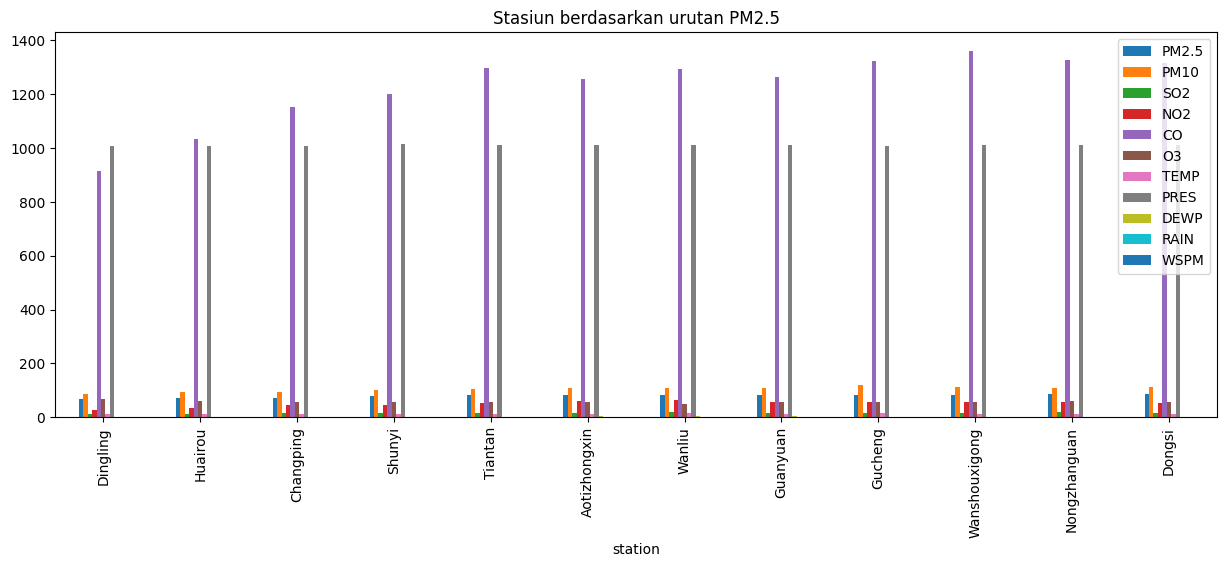

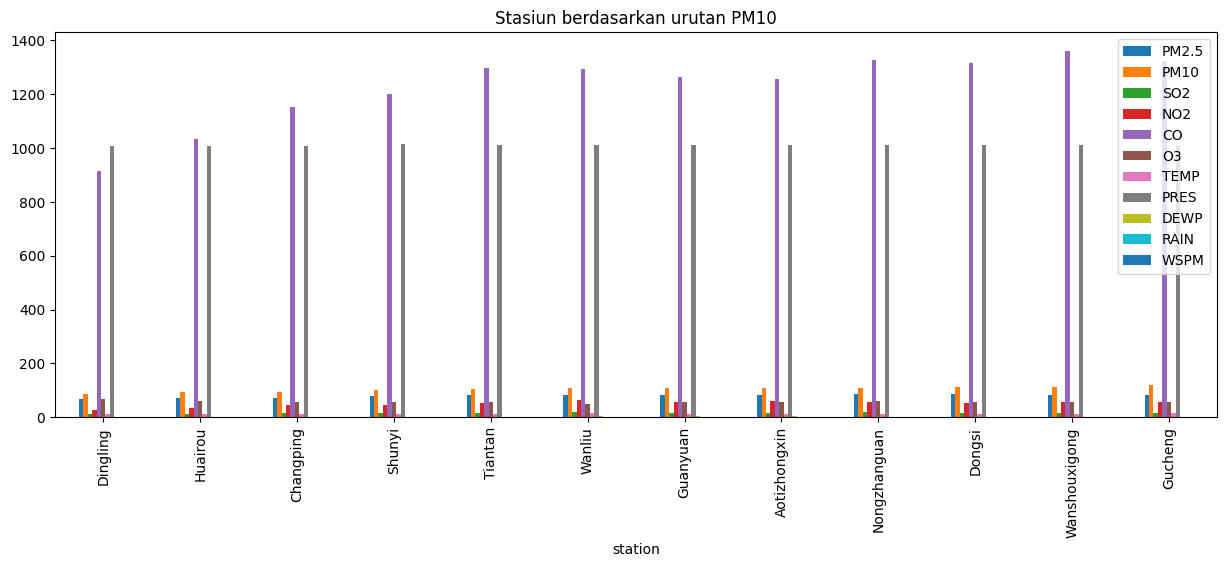

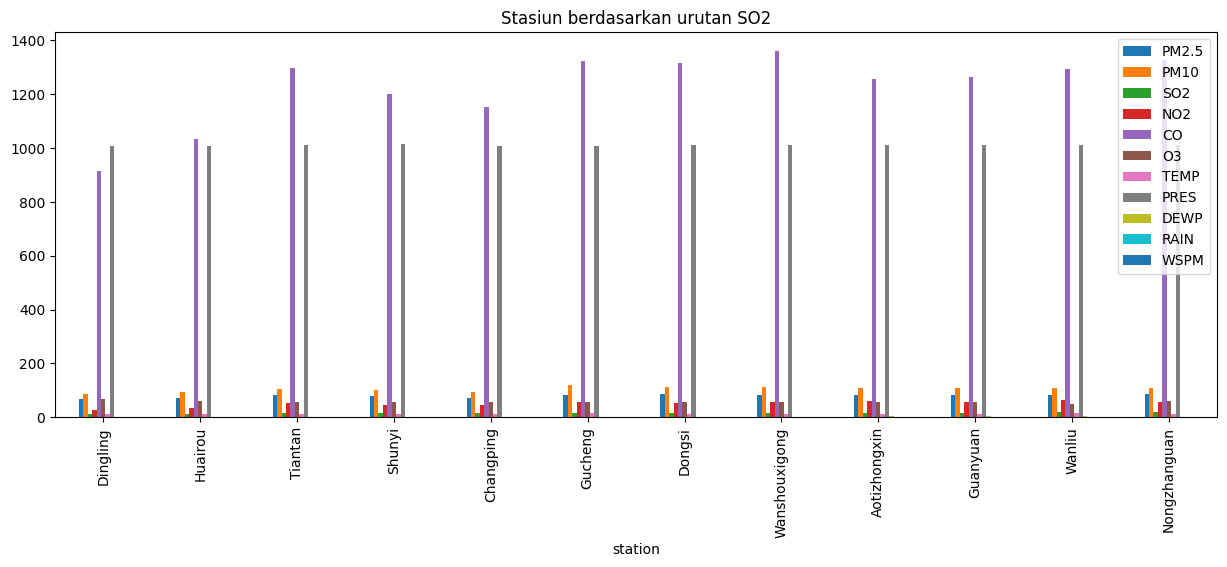

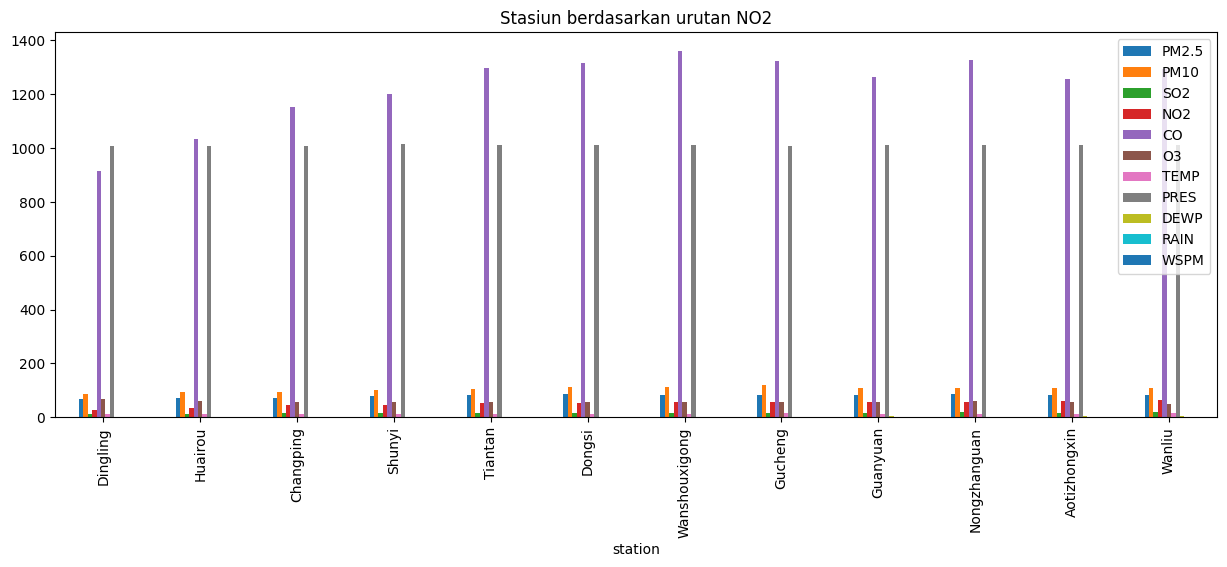

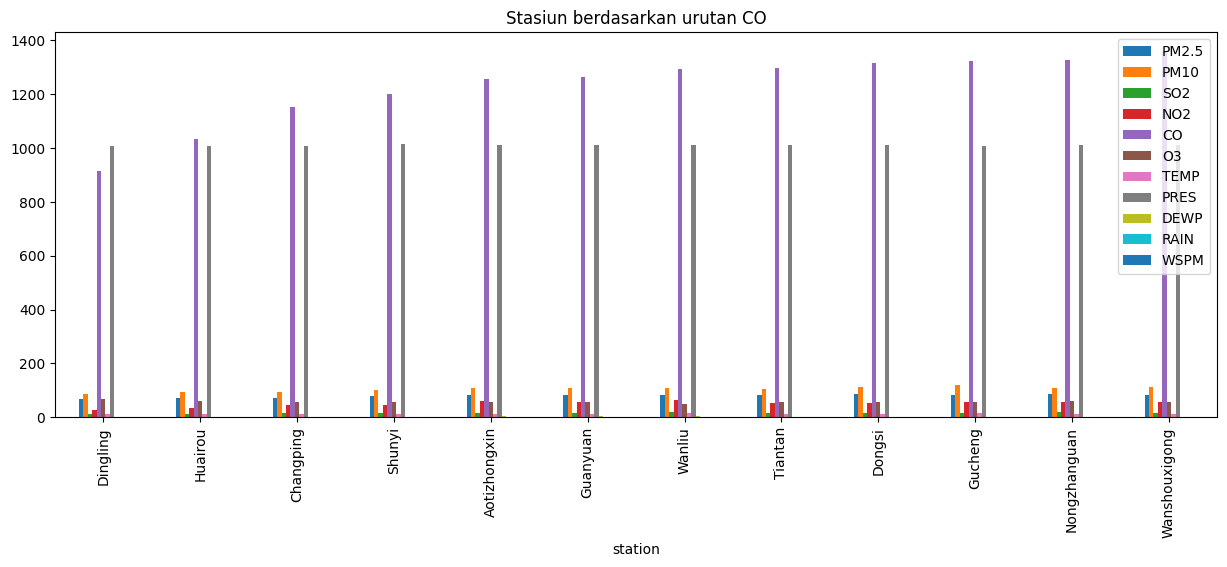

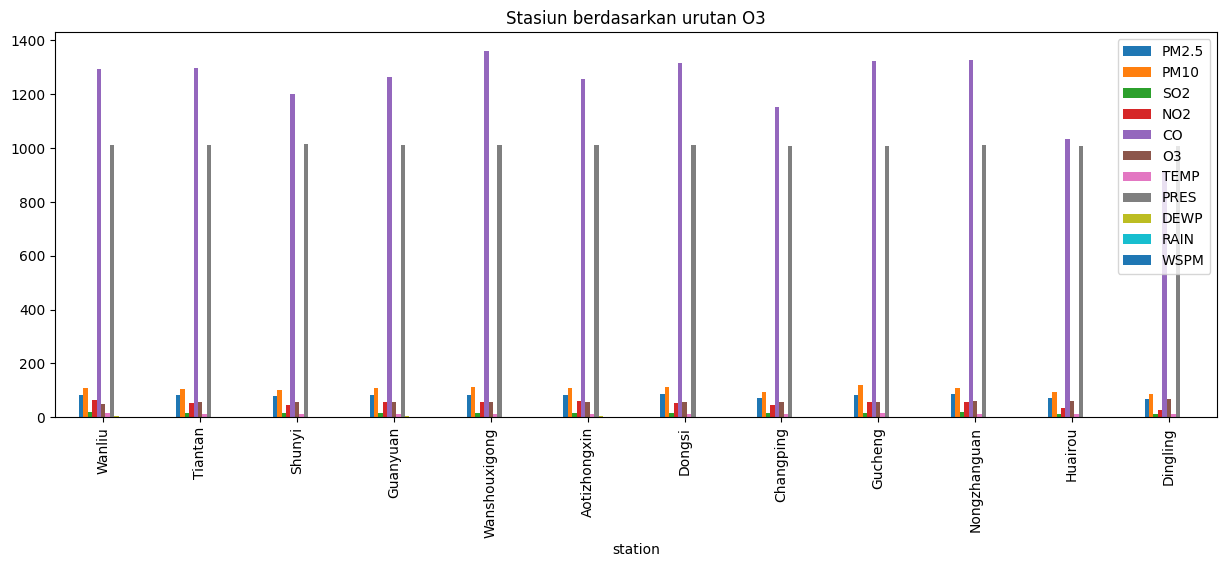

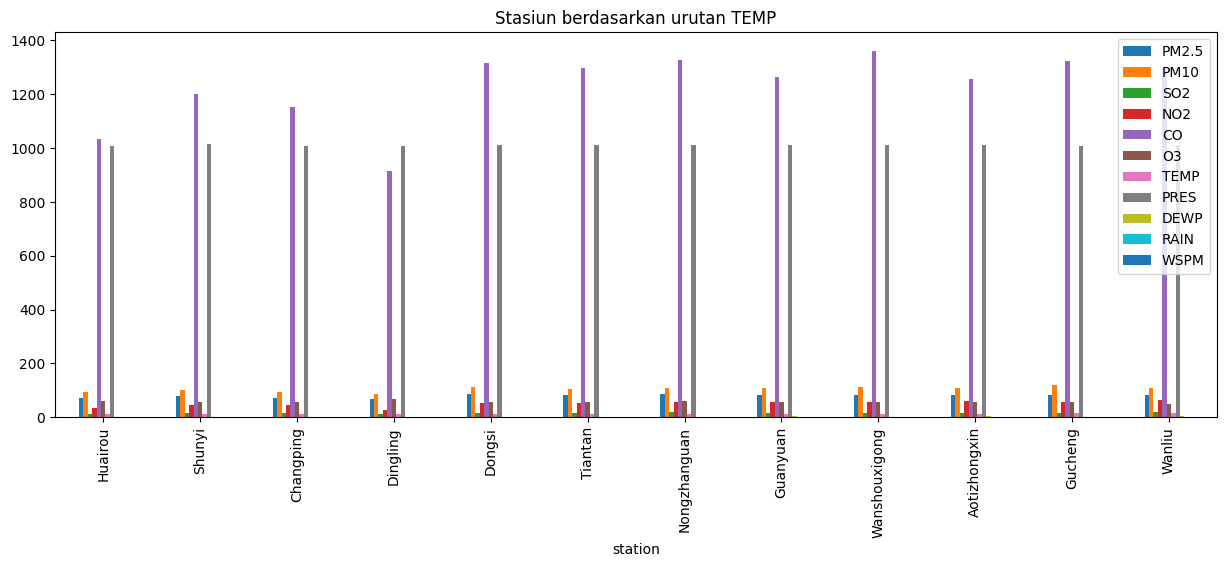

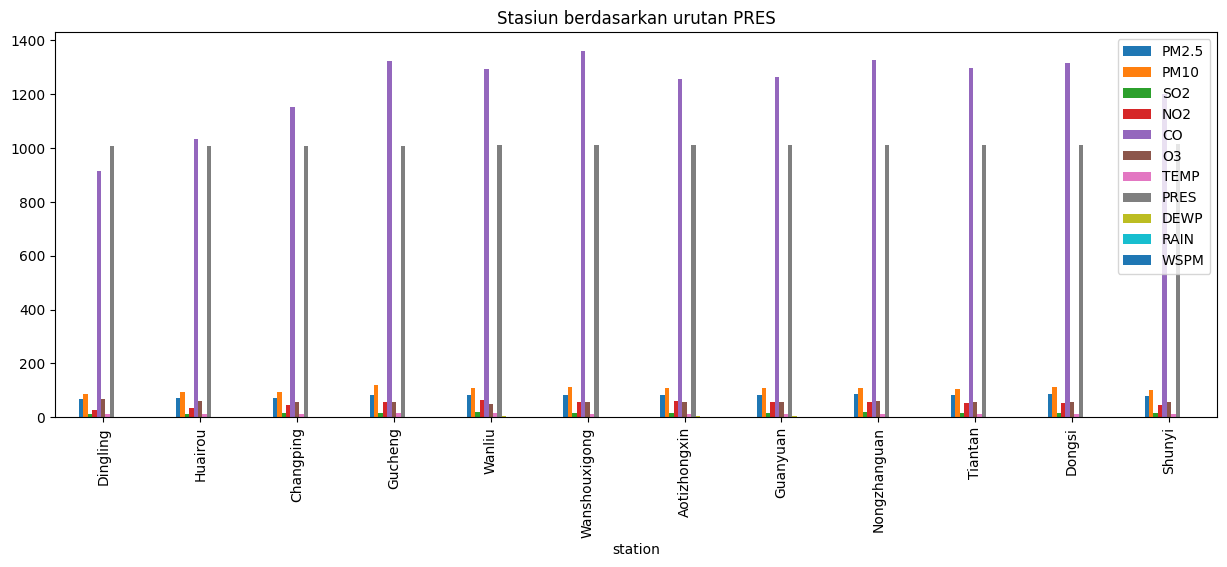

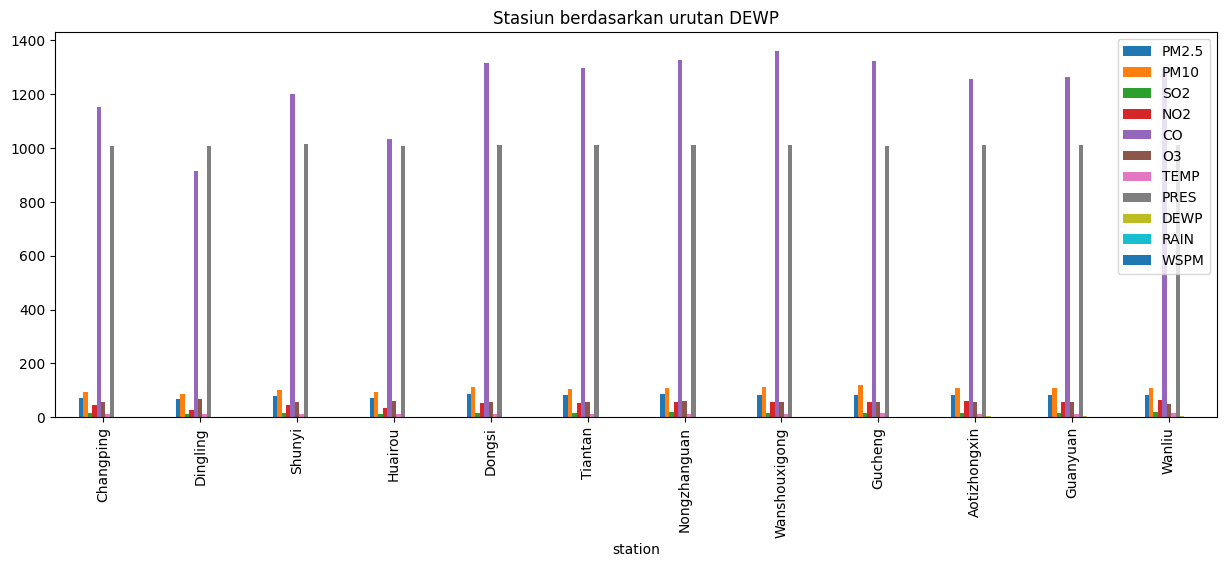

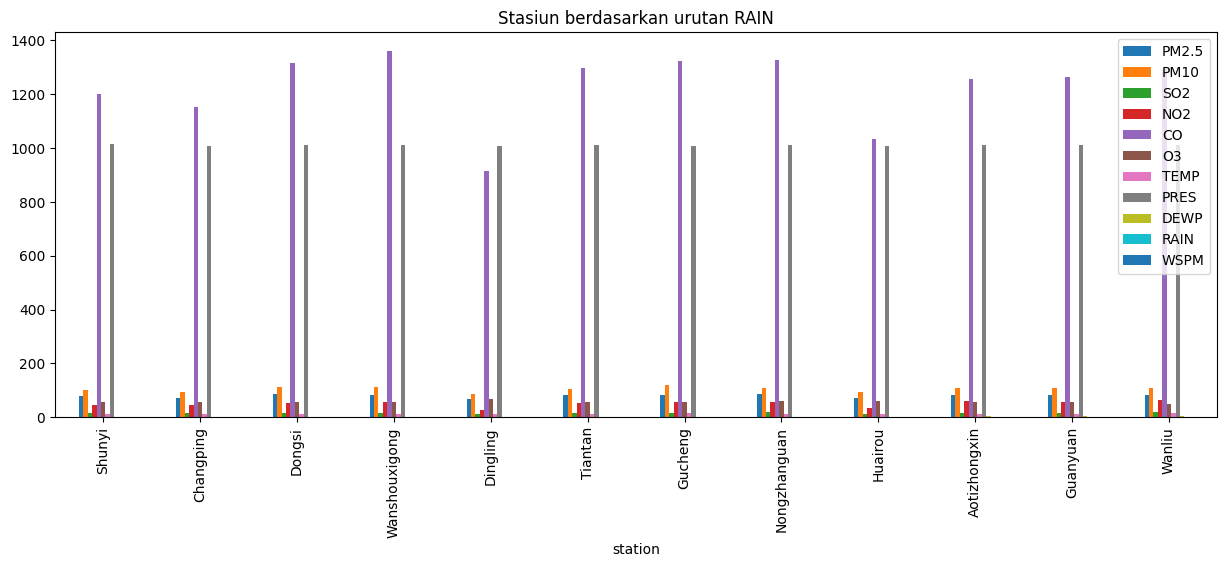

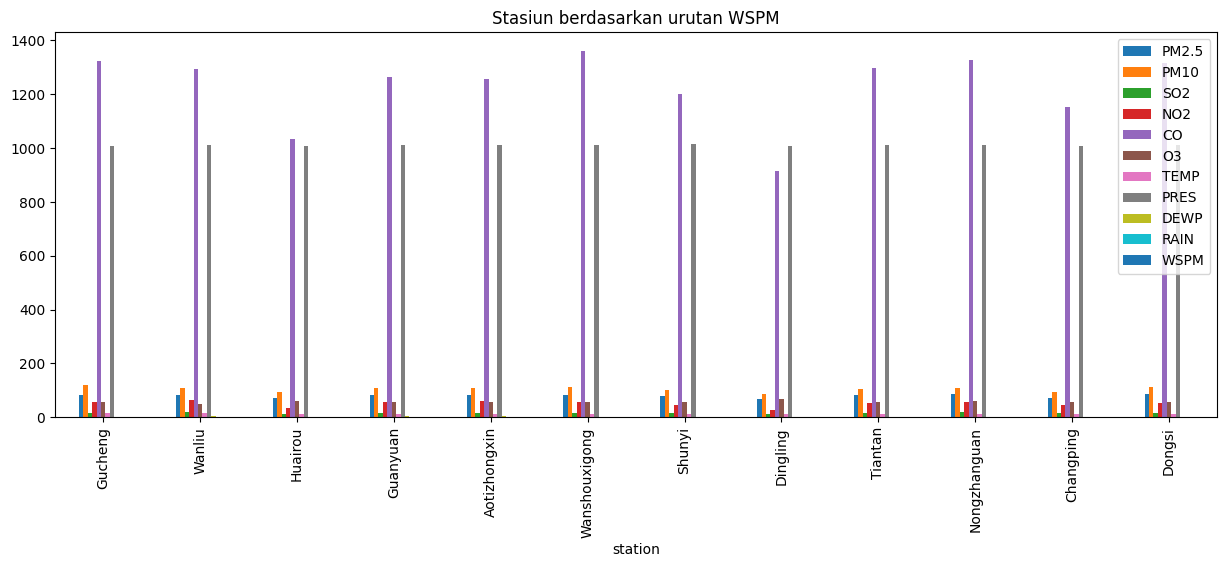

In [18]:
for i in aq_stasiun.columns:
  aq_stasiun_plot = aq_stasiun.reset_index()
  aq_stasiun_plot = aq_stasiun_plot.sort_values(by = i)
  aq_stasiun_plot = aq_stasiun_plot.set_index('station')
  aq_stasiun_plot.plot(figsize = (15, 5), kind = 'bar', stacked = False, title = f'Stasiun berdasarkan urutan {i}')

Dari plot tersebut, kita dapatkan bahwa stasiun Wanliu memiliki rata-rata pengukuran tertinggi terhadap beberapa indikator, yaitu NO2, TEMP, DEWP, dan RAIN.

Sedangkan rata-rata pengukuran terendah ada pada stasiun Dingling, yaitu indikator PM2.5, PM10, SO2, NO, CO, dan PRES.

### Pertanyaan 2: Bagaimana perkembangan indikator kualitas udara pertahunnya?

Untuk menjawab pertanyaan kedua, indikator CO dan PRES dipisahkan karena memiliki nilai yang jauh berbeda dibandingkan indikator lainnya. Karena ini dalam bentuk _time series_, maka plot ditampilkan sesuai urutan waktunya.

In [19]:
co_pres = ['CO', 'PRES']
other = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'DEWP','RAIN', 'WSPM']

<Axes: title={'center': 'Perkembangan CO dan PRES tahun ke tahun'}, xlabel='year'>

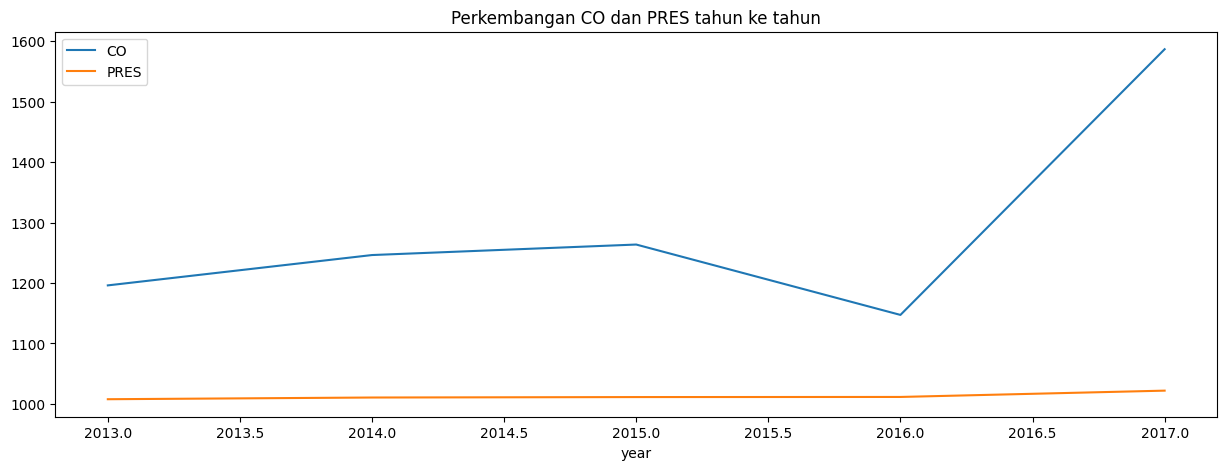

In [20]:
aq_tahun[co_pres].plot(figsize = (15, 5), kind = 'line', stacked = False, title = 'Perkembangan CO dan PRES tahun ke tahun')

Dari plot ini, didapatkan bahwa indikator CO mengalami peningkatan drastis dari 2016 ke 2017 sedangkan indikator PRES tidak mengalami perubahan yang signifikan sejak 2013.

<Axes: title={'center': 'Perkembangan indikator lain dari tahun ke tahun'}, xlabel='year'>

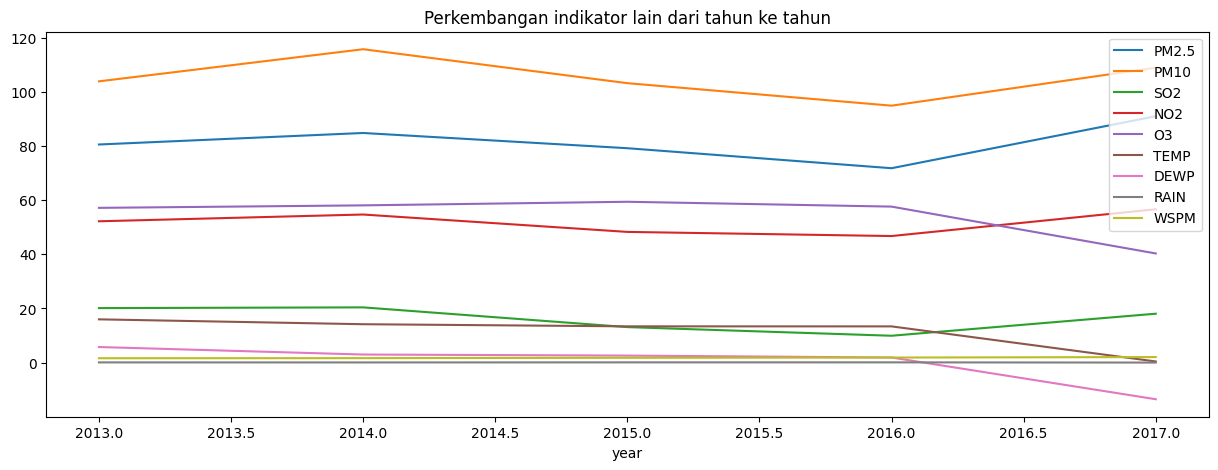

In [21]:
aq_tahun[other].plot(figsize = (15, 5), kind = 'line', stacked = False, title = f'Perkembangan indikator lain dari tahun ke tahun')

Dari plot ini, didapatkan bahwa sejak 2013 sampai 2016, tidak ada perubahan signifikan. Namun terjadi peningkatan cukup tinggi pada 2016 ke 2017 untuk PM2.5, PM10, NO2, dan SO2. Penurunan juga terjadi untuk O3, TEMP, dan DEWP. Selebihnya RAIN dan WSPM tidak ada perubahan yang berarti dari 2013 ke 2017.

### Pertanyaan 3: Bagaimana pergerakan tiap indikator perbulannya?

Jawaban pertanyaan ini mirip dengan nomor 2, perbedaan ada pada perincian untuk pergerakan tiap indikator

<Axes: title={'center': 'Perkembangan indikator lain per bulannya'}, xlabel='year,month'>

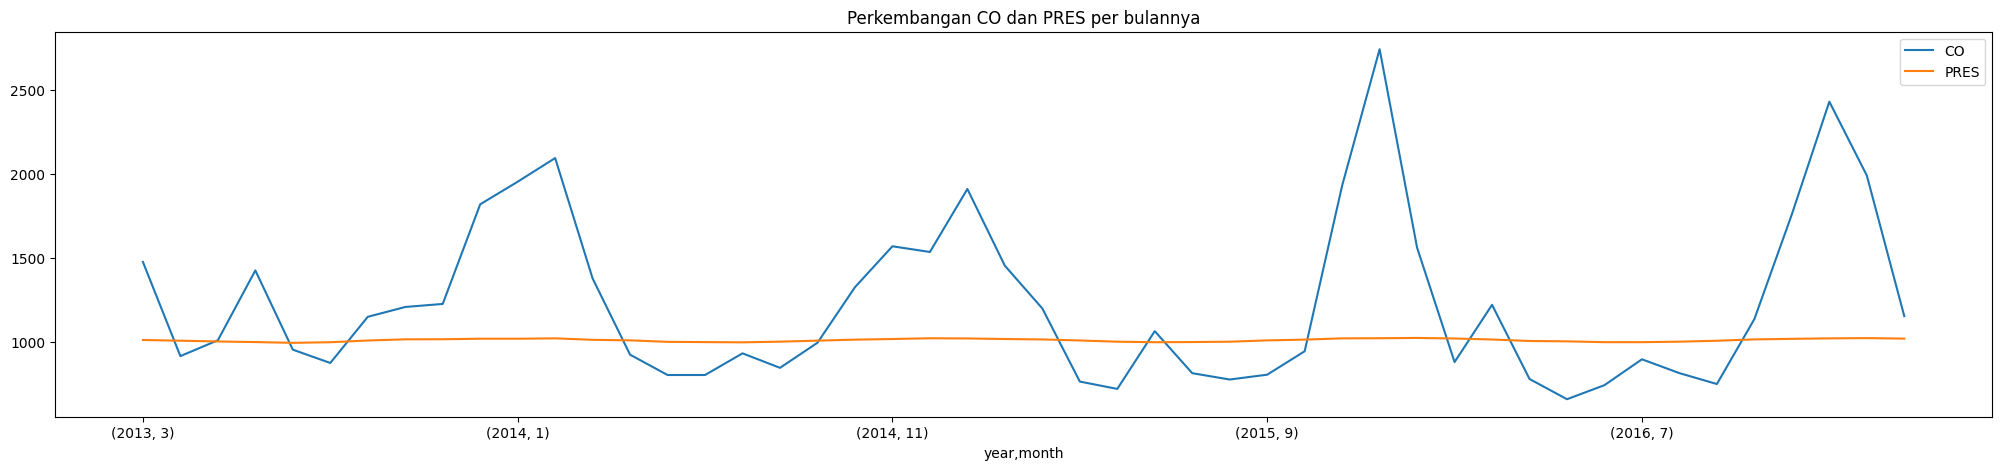

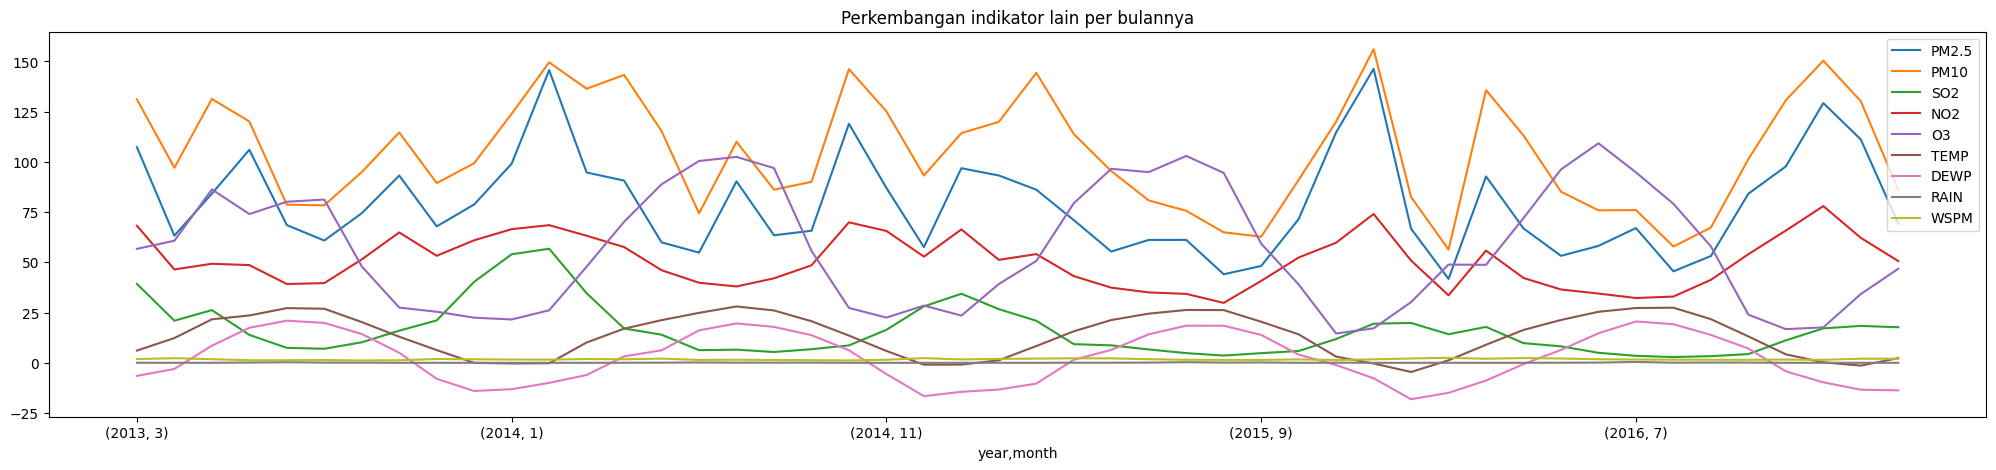

In [22]:
aq_bulan[co_pres].plot(figsize = (25, 5), kind = 'line', stacked = False, title = 'Perkembangan CO dan PRES per bulannya')
aq_bulan[other].plot(figsize = (25, 5), kind = 'line', stacked = False, title = f'Perkembangan indikator lain per bulannya')

Dari kedua plot tersebut, dapat kita lihat bahwa pergerakan tiap indikator cukup fluktuatif tiap bulannya. Agar dapat memahami waktu mana yang terdapat puncak tertinggi dan terendah, dapat kita cari berdasarkan index tabel.

In [23]:
#Mencari waktu saat titik tertinggi tiap indikator
for i in aq_bulan.columns:
  tertinggi = aq_bulan.iloc[np.where(aq_stasiun == aq_stasiun[i].max())]
  print(tertinggi)

                 PM2.5
year month            
2013 6      106.023961
                 PM10
year month           
2013 8      78.400492
                  SO2
year month           
2013 10     16.001671
                  NO2
year month           
2014 1      66.524374
                    CO
year month            
2014 2      2093.11382
                  O3
year month          
2013 5      86.31301
                TEMP
year month          
2014 1     -0.331713
                   PRES
year month             
2013 11     1016.498063
                DEWP
year month          
2014 1     -13.13226
            RAIN
year month      
2014 1       0.0
                WSPM
year month          
2013 6      1.289011


Dari hasil ini dapat kita simpulkan bahwa bulan pertama (januari) di 2014 menjadi waktu dengan tingkat NO2, TEMP, DEWP, dan RAIN tertinggi diantara bulan lainnya

In [24]:
#Mencari waktu saat titik terendah tiap indikator
for i in aq_bulan.columns:
  tertinggi = aq_bulan.iloc[np.where(aq_stasiun == aq_stasiun[i].min())]
  print(tertinggi)

                PM2.5
year month           
2013 5      84.182493
                  PM10
year month            
2013 5      131.338738
                  SO2
year month           
2013 5      26.237048
                  NO2
year month           
2013 5      49.299574
                     CO
year month             
2013 5      1010.463103
                   O3
year month           
2014 1      21.584984
                 TEMP
year month           
2013 9      20.285409
                   PRES
year month             
2013 5      1003.251615
                DEWP
year month          
2013 4     -3.061616
                RAIN
year month          
2013 11     0.000096
                WSPM
year month          
2013 8      1.380098


Sedangkan untuk tingkat terendah, terjadi pada bulan kelima (Mei) di Tahun 2013 dimana indikator tersebut diantaranya PM2.5, PM10, SO2, NO2, CO, dan PRES.

## Conclusion

- Conclution pertanyaan 1.

  Daerah stasiun Wanliu menjadi perhatian besar karena tingkat indikator air quality yang cukup tinggi dimana NO2, temperatur suhu, dan intensitas hujan yang tinggi. Sedangkan untuk daerah Dingling perlu dijaga agar indikatornya tetap rendah.


- Conclution pertanyaan 2

  Tidak ada perubahan kualitas udara yang signifikan dari 2013 sampai 2016. Namun terdapat kenaikan serta penurunan yang cukup jelas pada beberapa indikator.

- Conclution pertanyaan 3

  Pergerakan kualitas udara tiap bulannya cukup fluktuatif dimana meninggi dan merendah di waktu-waktu tertentu. Januari 2014 menjadi puncak tertinggi kadar Nitrogen Dioksida, temperatur suhu, dan intensitas hujan tertinggi. Sedangkan bulan Mei Tahun 2013 adalah waktu kualitas udara cukup baik dimana PM2.5, PM10, Sulfur Dioksida, Nitrogen Dioksida, Carbon Monoksida, dan Tekanan udara cukup rendah pada bulan itu.